In [53]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd


In [61]:
#Abrindo arquivo .nc
ds = xr.open_dataset('/content/precipitação_media_mensal_1990-2024.nc')

In [59]:
print(ds)  # Para verificar as dimensões e variáveis disponíveis
print(ds['tp'])  # Para inspecionar a variável de precipitação

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 420, latitude: 40, longitude: 62)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 3kB 1990-01-01T06:00:00 ... 2024-...
  * latitude    (latitude) float64 320B -13.7 -13.95 -14.2 ... -23.2 -23.45
  * longitude   (longitude) float64 496B -53.1 -52.85 -52.6 ... -38.1 -37.85
    expver      (valid_time) <U4 7kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
<xarray.DataArray 'tp' (valid_time: 420, latitude: 40, longitude: 62)> Size: 4MB
[1041600 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 3kB 1990-01-01T06:00:00 ... 2024-..

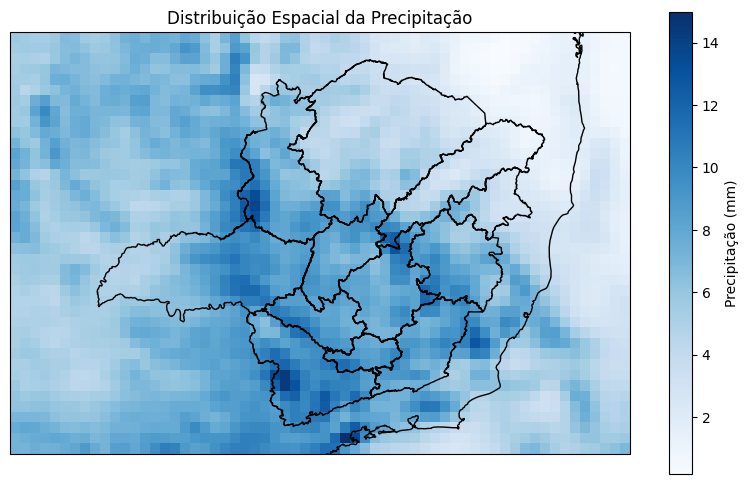

In [125]:
# Carregar o dataset
ds = xr.open_dataset('/content/precipitação_media_mensal_1990-2024.nc')

# Selecionar a precipitação média para o último mês disponível
ds['tp']
#precipitation_m = ds['tp'].isel(valid_time=-1)
data_escolhida = '2024-12'
precipitation_m = ds['tp'].sel(valid_time=data_escolhida)
precipitation = precipitation_m * 1000

# Carregar o shapefile
shapefile_path = '/content/mg_meso_shap/MG_Mesorregioes_2022.shp'
gdf = gpd.read_file(shapefile_path)

# Plotar a distribuição espacial da precipitação
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Adicionar contornos preenchidos da precipitação
precipitation.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'label': 'Precipitação (mm)'})

# Adicionar feições geográficas
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Adicionar shapefile ao mapa
gdf.plot(ax=ax, edgecolor='black', facecolor='none')

# Configurar título e rótulos
plt.title('Distribuição Espacial da Precipitação')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Mostrar o gráfico
plt.show()


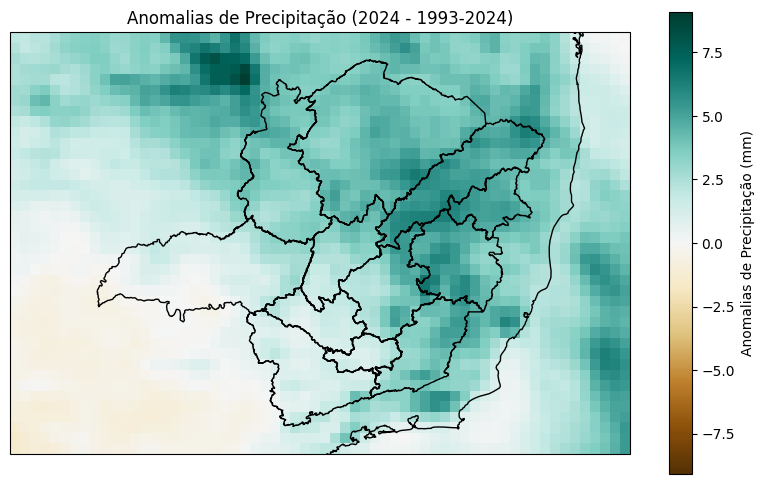

In [126]:

# Carregar o dataset
ds = xr.open_dataset('/content/precipitação_media_mensal_1990-2024.nc')

# Calcular a precipitação média de referência (1990-2000, por exemplo)
mean_reference_period = ds.sel(valid_time=slice('1993-01-01', '2023-12-31')).mean(dim='valid_time')

# Selecionar a precipitação média para um período específico (2020, por exemplo)
mean_specific_period = ds.sel(valid_time=slice('2023-12-01', '2024-02-29')).mean(dim='valid_time')

# Calcular anomalias
anomalies = mean_specific_period - mean_reference_period

# Converter anomalias de metros para milímetros
anomalies_mm = anomalies * 1000

# Carregar o shapefile
shapefile_path = '/content/mg_meso_shap/MG_Mesorregioes_2022.shp'
gdf = gpd.read_file(shapefile_path)

# Plotar as anomalias de precipitação
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Adicionar contornos preenchidos das anomalias
anomalies_mm['tp'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='BrBG', cbar_kwargs={'label': 'Anomalias de Precipitação (mm)'})

# Adicionar feições geográficas
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Adicionar shapefile ao mapa
gdf.plot(ax=ax, edgecolor='black', facecolor='none')

# Configurar título e rótulos
plt.title('Anomalias de Precipitação (2024 - 1993-2024)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Mostrar o gráfico
plt.show()


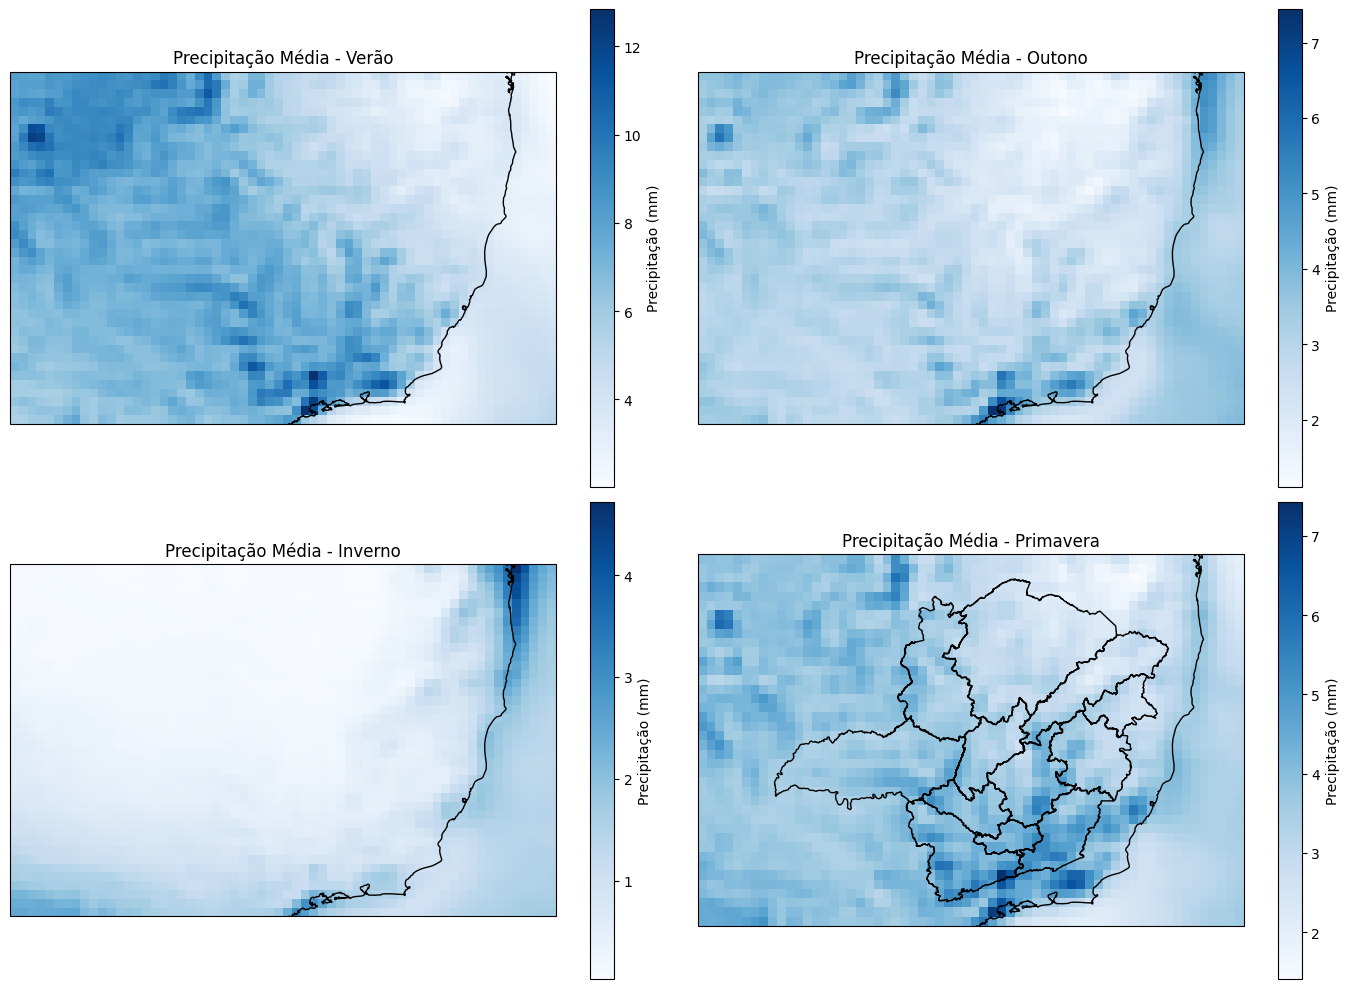

In [93]:

# Carregar o dataset
ds = xr.open_dataset('/content/precipitação_media_mensal_1990-2024.nc')


# Função para agrupar por estação
def seasonal_mean(ds, season):
    if season == 'Verão':
        return ds.sel(valid_time=ds['valid_time.season'] == 'DJF').mean(dim='valid_time')
    elif season == 'Outono':
        return ds.sel(valid_time=ds['valid_time.season'] == 'MAM').mean(dim='valid_time')
    elif season == 'Inverno':
        return ds.sel(valid_time=ds['valid_time.season'] == 'JJA').mean(dim='valid_time')
    elif season == 'Primavera':
        return ds.sel(valid_time=ds['valid_time.season'] == 'SON').mean(dim='valid_time')
    else:
        raise ValueError('Estação inválida.')

# Calcular a precipitação média para cada estação
summer_precipitation = seasonal_mean(ds, 'Verão') * 1000
autumn_precipitation = seasonal_mean(ds, 'Outono') * 1000
winter_precipitation = seasonal_mean(ds, 'Inverno') * 1000
spring_precipitation = seasonal_mean(ds, 'Primavera') * 1000

# Carregar o shapefile
shapefile_path = '/content/mg_meso_shap/MG_Mesorregioes_2022.shp'
gdf = gpd.read_file(shapefile_path)

# Criar figuras para cada estação
seasons = {'Verão': summer_precipitation, 'Outono': autumn_precipitation, 'Inverno': winter_precipitation, 'Primavera': spring_precipitation}
fig, axes = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()


for ax, (season, precipitation) in zip(axes, seasons.items()):
    precipitation['tp'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'label': 'Precipitação (mm)'})
    ax.set_title(f'Precipitação Média - {season}')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Adicionar shapefile ao mapa
gdf.plot(ax=ax, edgecolor='black', facecolor='none')

plt.tight_layout()
plt.show()
